Dataset Overview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150

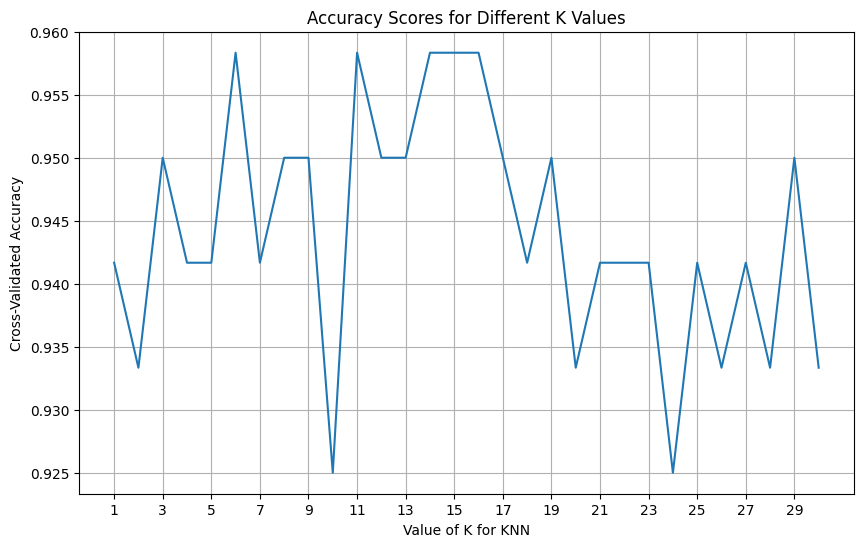


Optimal value of k: 11

Accuracy Score: 1.0000


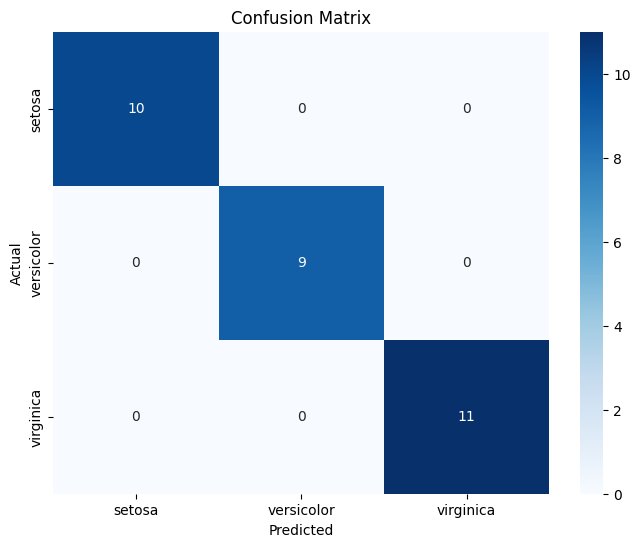


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



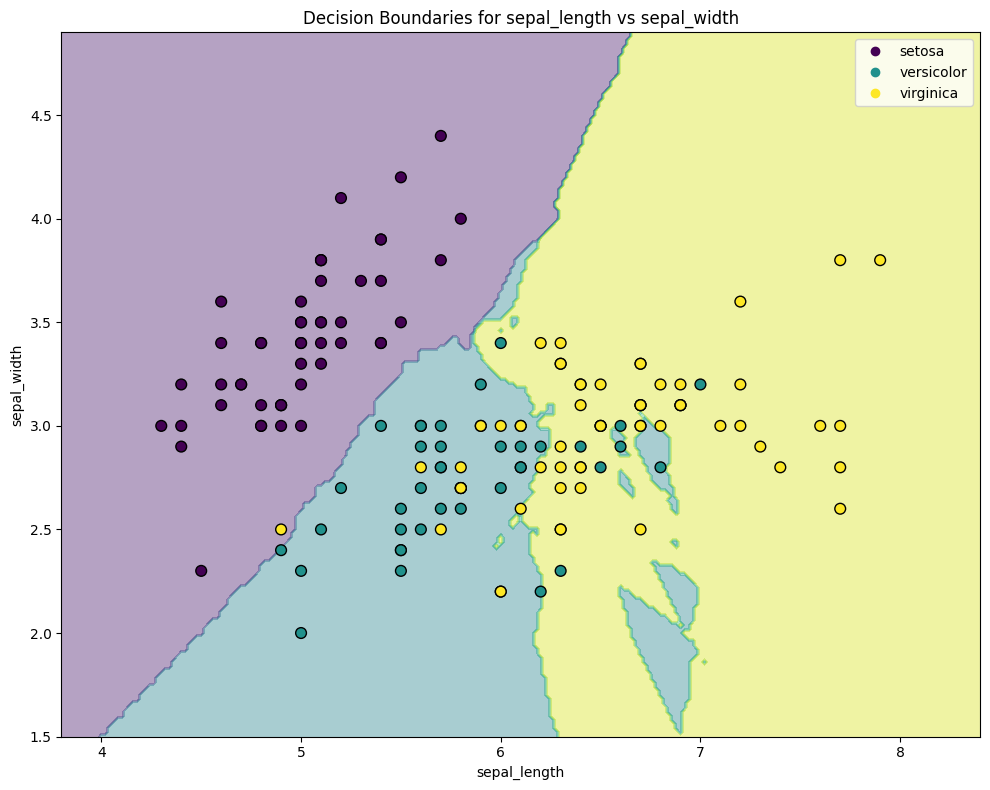

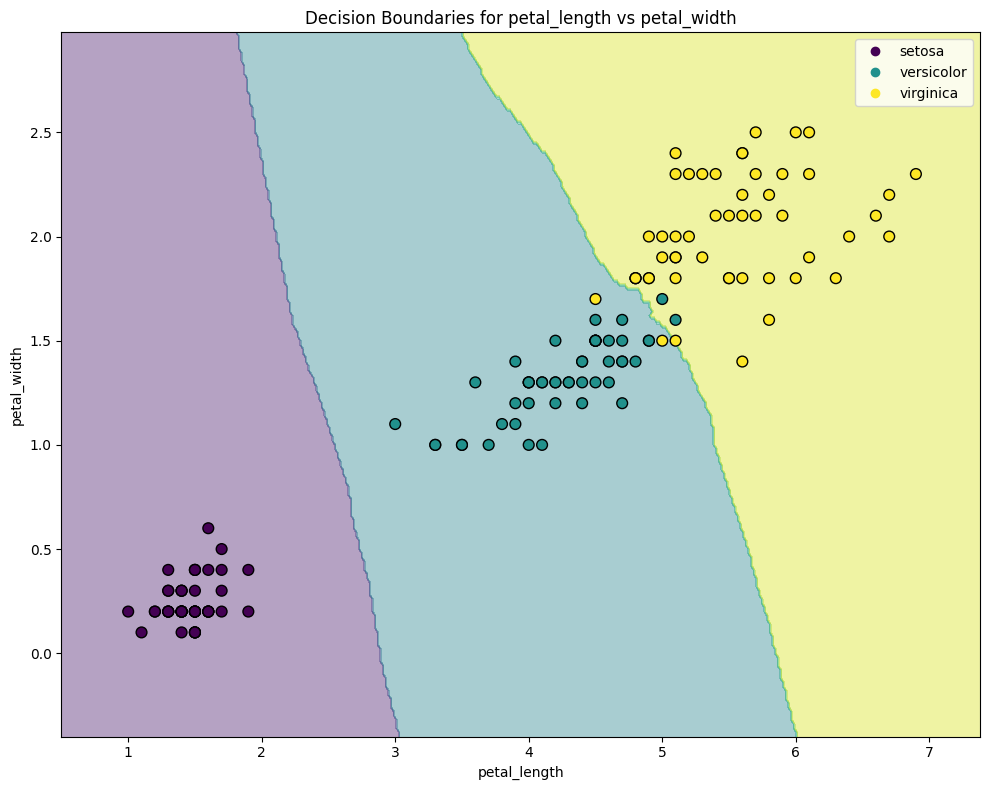

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris_df = pd.read_csv('/content/iris (1).csv')

# Let's take a quick look at the dataset
print("Dataset Overview:")
print(iris_df.head())
print("\nDataset Info:")
print(iris_df.info())
print("\nStatistical Summary:")
print(iris_df.describe())
print("\nClass Distribution:")
print(iris_df['species'].value_counts())

# Encode the target variable
le = LabelEncoder()
encoded_species = le.fit_transform(iris_df['species'])

# Split features and target
X = iris_df.drop('species', axis=1)
y = encoded_species  # Using encoded values

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Finding the optimal K value
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the K values vs accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy Scores for Different K Values')
plt.grid(True)
plt.xticks(np.arange(1, 31, step=2))
plt.show()

# Find the optimal k value
optimal_k = k_scores.index(max(k_scores)) + 1
print(f"\nOptimal value of k: {optimal_k}")

# Train the KNN classifier with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize the decision boundaries (fixed version)
def plot_decision_boundaries(X, y, model, feature_pair=(0, 1)):
    # Extract the two features we want to visualize
    feature1_idx, feature2_idx = feature_pair
    X_features = X.iloc[:, [feature1_idx, feature2_idx]].values

    # Create a mesh grid
    x_min, x_max = X_features[:, 0].min() - 0.5, X_features[:, 0].max() + 0.5
    y_min, y_max = X_features[:, 1].min() - 0.5, X_features[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Train the model on these two features
    model_2d = KNeighborsClassifier(n_neighbors=optimal_k)
    model_2d.fit(X_features, y)

    # Predict on the mesh grid
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot the training points
    scatter = plt.scatter(X_features[:, 0], X_features[:, 1], c=y, edgecolor='k', s=60)
    plt.xlabel(X.columns[feature1_idx])
    plt.ylabel(X.columns[feature2_idx])
    plt.title(f'Decision Boundaries for {X.columns[feature1_idx]} vs {X.columns[feature2_idx]}')

    # Create a legend with class names
    handles, _ = scatter.legend_elements()
    plt.legend(handles, [le.classes_[i] for i in range(len(le.classes_))])

    plt.tight_layout()
    plt.show()

# Plot decision boundaries for different feature pairs
plot_decision_boundaries(X, y, knn_optimal, feature_pair=(0, 1))  # sepal_length vs sepal_width
plot_decision_boundaries(X, y, knn_optimal, feature_pair=(2, 3))  # petal_length vs petal_width

Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 

<ipython-input-3-87976466fcbb>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df[column].fillna(diabetes_df[column].mean(), inplace=True)


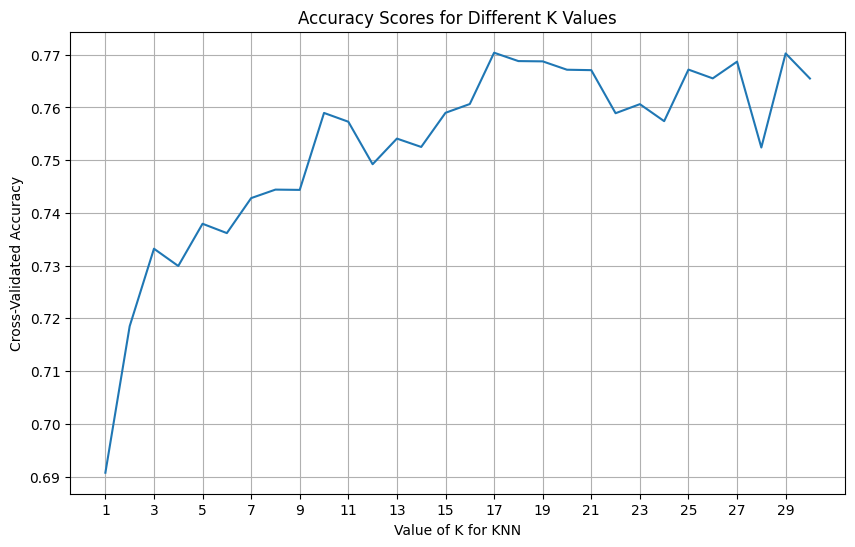


Optimal value of k: 17

Accuracy Score: 0.7727


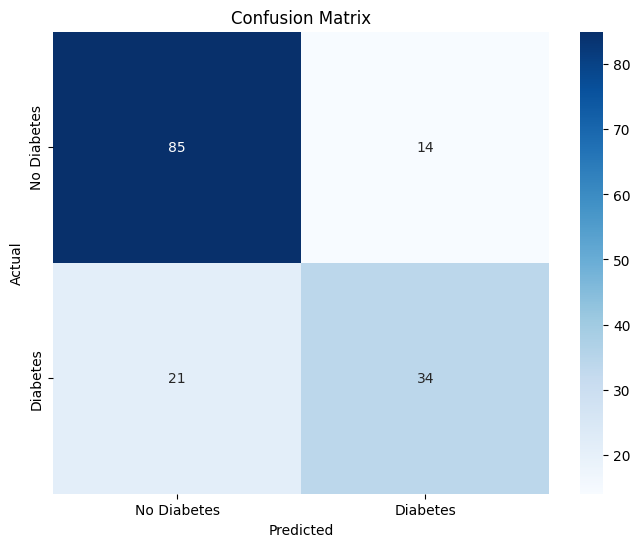


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.86      0.83        99
    Diabetes       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154


Feature Importance (by drop in accuracy when removed):
Glucose: 0.0560
BloodPressure: 0.0143
Insulin: 0.0105
BMI: 0.0064
Age: 0.0013
SkinThickness: -0.0052
DiabetesPedigreeFunction: -0.0065
Pregnancies: -0.0117


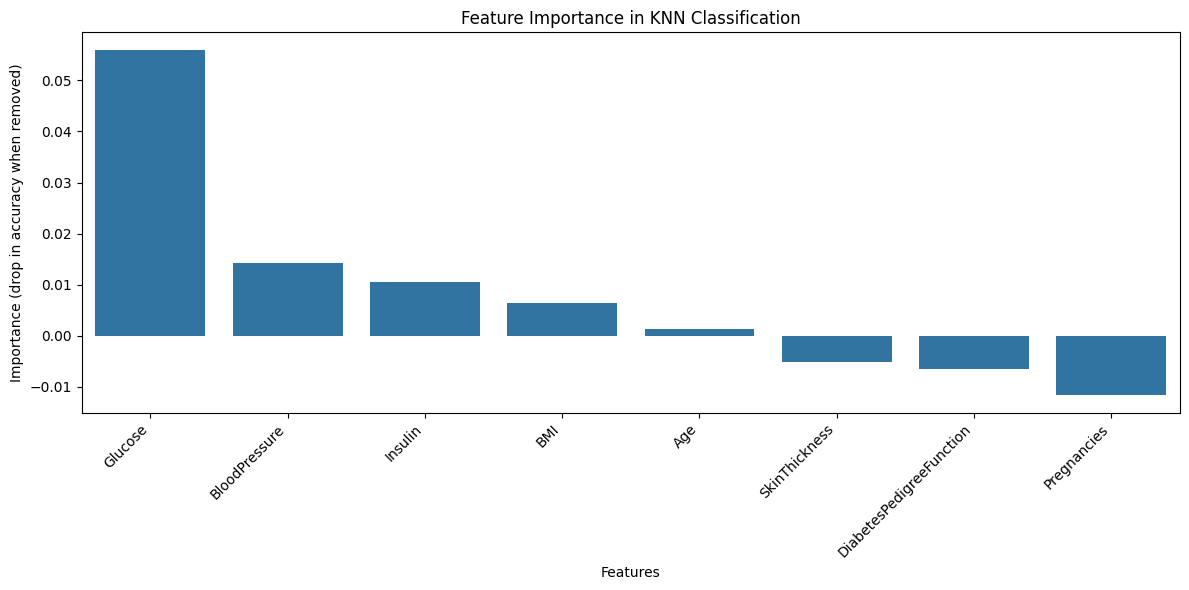

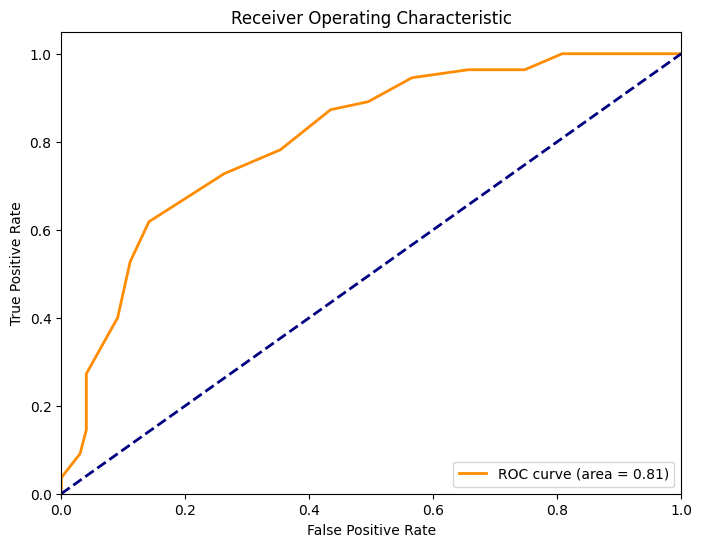

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score

# Load the Pima Indians Diabetes dataset
# URL for the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diabetes_df = pd.read_csv('/content/diabetes.csv')

# Let's take a quick look at the dataset
print("Dataset Overview:")
print(diabetes_df.head())
print("\nDataset Info:")
print(diabetes_df.info())
print("\nStatistical Summary:")
print(diabetes_df.describe())
print("\nClass Distribution:")
print(diabetes_df['Outcome'].value_counts())

# Check for missing values (zeros in certain columns can be considered as missing values)
print("\nCount of zeros in each column that might represent missing values:")
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    print(f"{column}: {(diabetes_df[column] == 0).sum()}")

# Handle missing values (replace 0s with NaN and then impute with mean)
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    # Replace 0s with NaN
    diabetes_df[column] = diabetes_df[column].replace(0, np.nan)
    # Impute with mean
    diabetes_df[column].fillna(diabetes_df[column].mean(), inplace=True)

# Split features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal K value using cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the K values vs accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy Scores for Different K Values')
plt.grid(True)
plt.xticks(np.arange(1, 31, step=2))
plt.show()

# Find the optimal k value
optimal_k = k_scores.index(max(k_scores)) + 1
print(f"\nOptimal value of k: {optimal_k}")

# Train the KNN classifier with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Feature importance analysis
def analyze_feature_importance(X, y, scaler, optimal_k):
    feature_scores = []
    base_score = cross_val_score(KNeighborsClassifier(n_neighbors=optimal_k),
                                scaler.transform(X), y, cv=5).mean()

    for i in range(X.shape[1]):
        # Create a copy of the data without the current feature
        X_reduced = X.copy()
        X_reduced = X_reduced.drop(X.columns[i], axis=1)

        # Scale the reduced dataset
        reduced_scaler = StandardScaler()
        X_reduced_scaled = reduced_scaler.fit_transform(X_reduced)

        # Calculate accuracy without this feature
        score = cross_val_score(KNeighborsClassifier(n_neighbors=optimal_k),
                              X_reduced_scaled, y, cv=5).mean()

        # Calculate the importance (decrease in accuracy when feature is removed)
        importance = base_score - score
        feature_scores.append((X.columns[i], importance))

    # Sort features by importance
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    return feature_scores

# Analyze feature importance
feature_importance = analyze_feature_importance(X, y, scaler, optimal_k)
print("\nFeature Importance (by drop in accuracy when removed):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 6))
features, importances = zip(*feature_importance)
sns.barplot(x=list(features), y=list(importances))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance (drop in accuracy when removed)')
plt.title('Feature Importance in KNN Classification')
plt.tight_layout()
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

# Get the probability predictions
y_prob = knn_optimal.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve points
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Heart Disease Dataset Overview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int

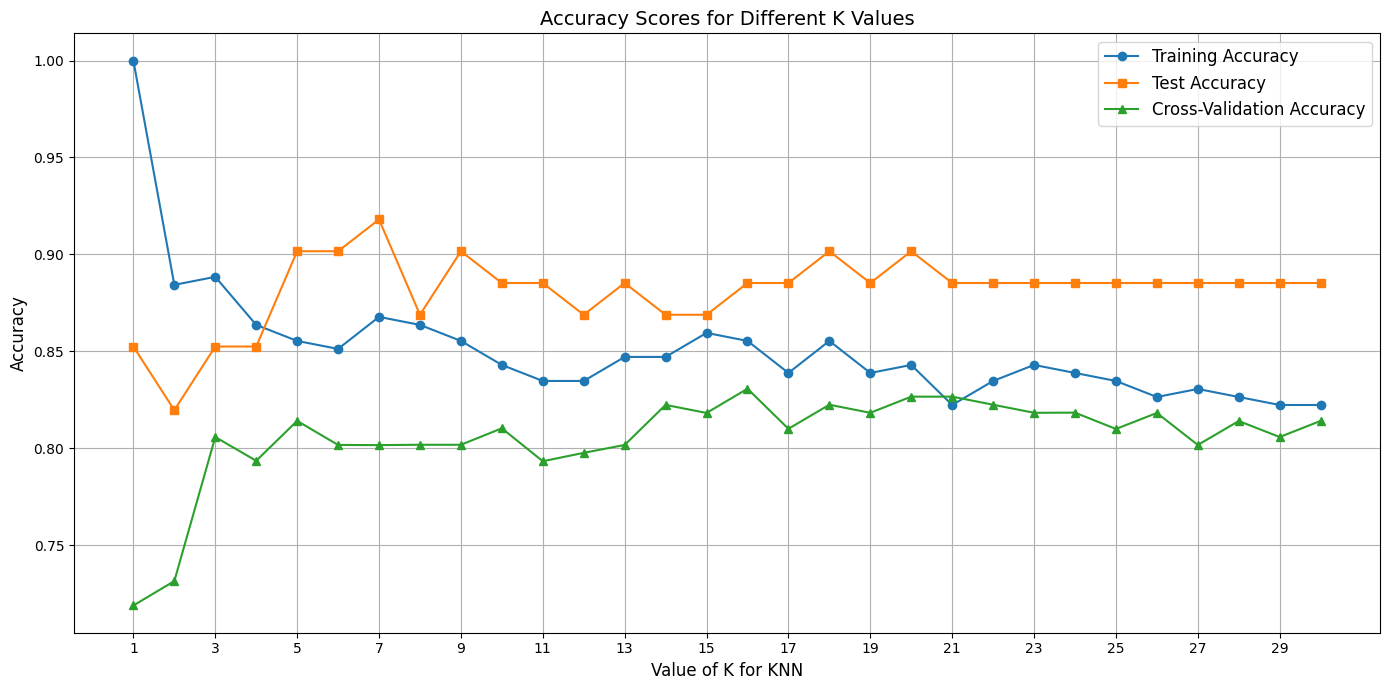


Optimal k based on test set: 7
Maximum test accuracy: 0.9180

Optimal k based on cross-validation: 16
Maximum cross-validation accuracy: 0.8307

Final selected optimal k: 16

Final Model Accuracy on Test Set: 0.8852


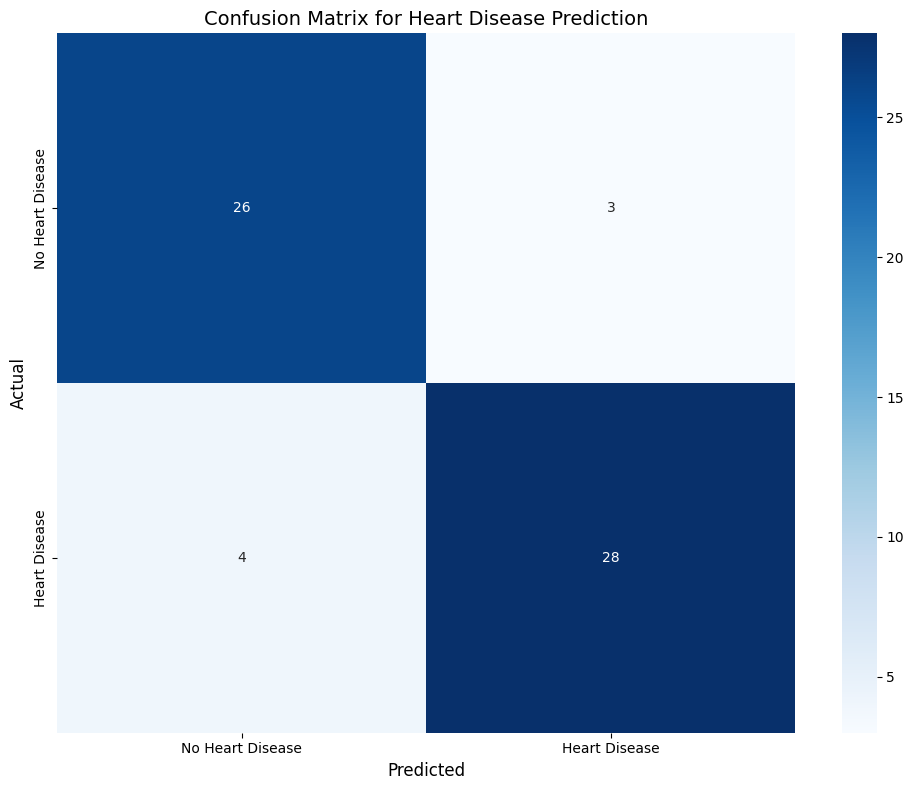


Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.90      0.88        29
   Heart Disease       0.90      0.88      0.89        32

        accuracy                           0.89        61
       macro avg       0.88      0.89      0.89        61
    weighted avg       0.89      0.89      0.89        61


Feature Importance (measured by drop in accuracy when removed):
exang: 0.0330
cp: 0.0296
thal: 0.0266
sex: 0.0232
thalach: 0.0198
ca: 0.0197
oldpeak: 0.0132
slope: 0.0131
fbs: 0.0099
trestbps: 0.0098
chol: -0.0099
age: -0.0100
restecg: -0.0101


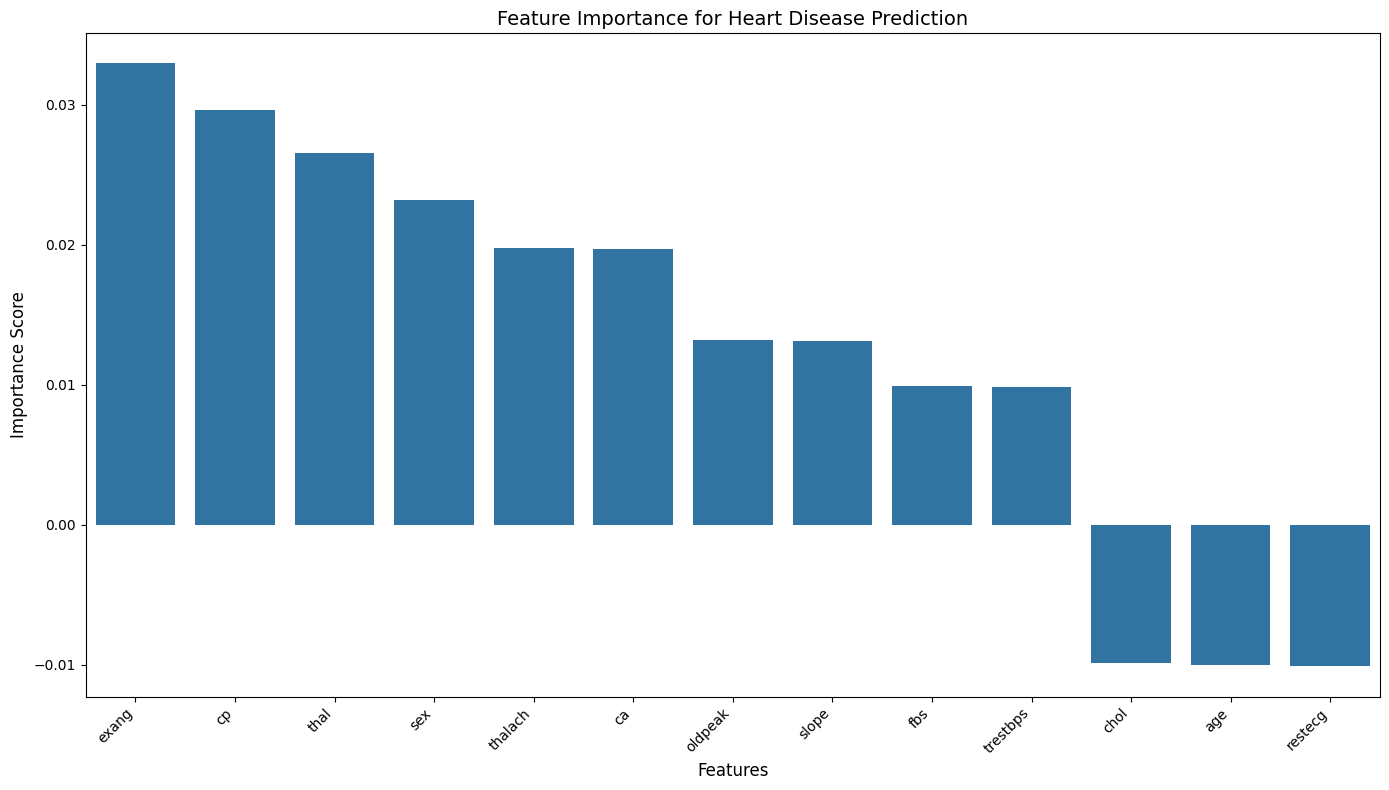


Visualizing decision boundaries using the two most important features: ['exang', 'cp']


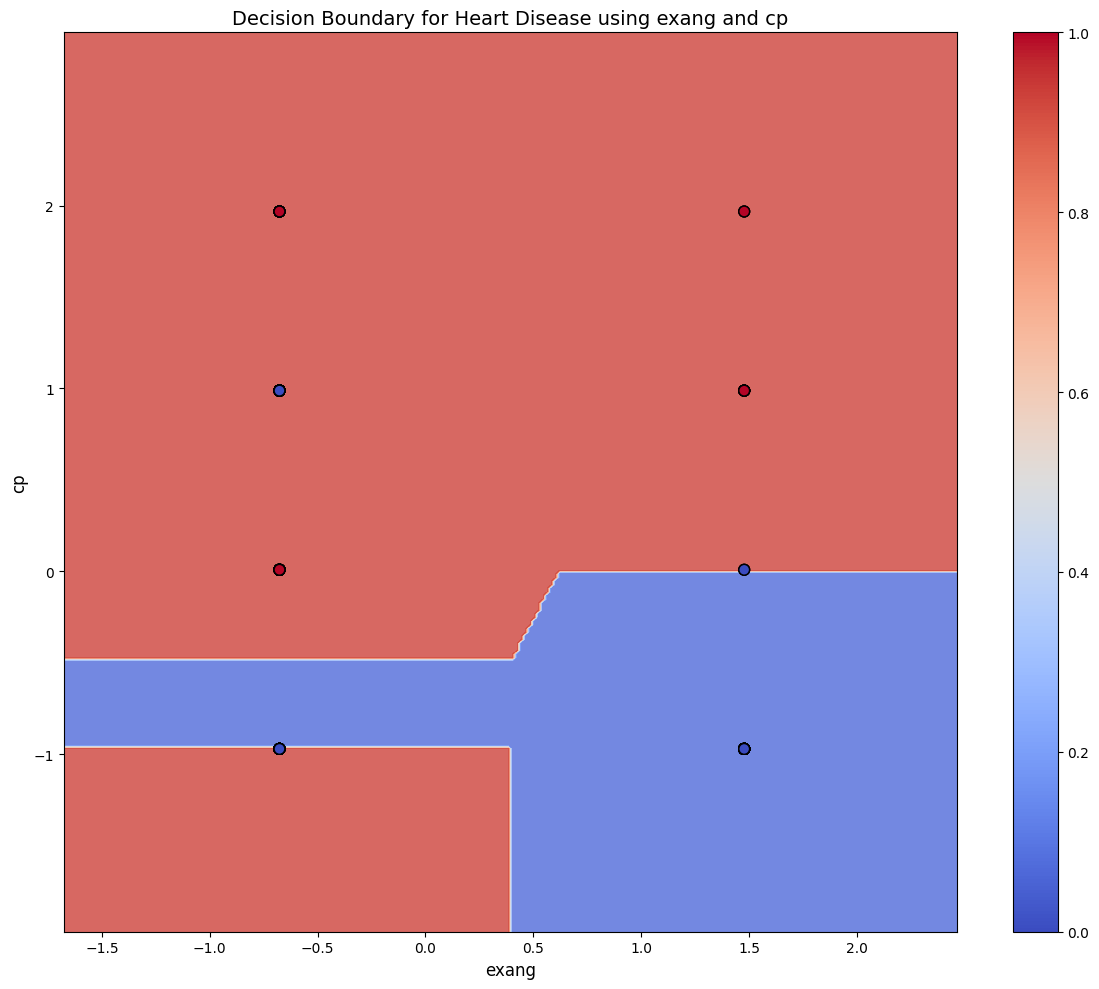

Accuracy using only the top 2 features: 0.7213
Compare to full model accuracy: 0.8852


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Since the heart.csv file wasn't provided, we'll use the common UCI Heart Disease dataset
# If you have a specific heart.csv file, replace this URL with your file loading code
url = "https://raw.githubusercontent.com/datasets/heart-disease/main/data/heart.csv"
heart_df = pd.read_csv('/content/heart.csv')

# Display dataset information
print("Heart Disease Dataset Overview:")
print(heart_df.head())
print("\nDataset Info:")
print(heart_df.info())
print("\nStatistical Summary:")
print(heart_df.describe())
print("\nClass Distribution:")
print(heart_df['target'].value_counts())

# Split features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test a wide range of K values to find the optimal one
k_range = range(1, 31)
train_scores = []
test_scores = []
cv_scores = []

for k in k_range:
    # Create and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Get training and test scores
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

    # Get cross-validation score
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    cv_scores.append(cv_score)

# Plot the training, test, and CV scores
plt.figure(figsize=(14, 7))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Test Accuracy', marker='s')
plt.plot(k_range, cv_scores, label='Cross-Validation Accuracy', marker='^')
plt.xlabel('Value of K for KNN', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Scores for Different K Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(np.arange(1, 31, step=2))
plt.tight_layout()
plt.show()

# Find the optimal k value based on test set performance
optimal_k_test = k_range[np.argmax(test_scores)]
print(f"\nOptimal k based on test set: {optimal_k_test}")
print(f"Maximum test accuracy: {max(test_scores):.4f}")

# Find the optimal k value based on cross-validation
optimal_k_cv = k_range[np.argmax(cv_scores)]
print(f"\nOptimal k based on cross-validation: {optimal_k_cv}")
print(f"Maximum cross-validation accuracy: {max(cv_scores):.4f}")

# Choose the final optimal k based on cross-validation (more reliable)
optimal_k = optimal_k_cv
print(f"\nFinal selected optimal k: {optimal_k}")

# Train the final model with the optimal k value
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = final_knn.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy on Test Set: {final_accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for Heart Disease Prediction', fontsize=14)
plt.tight_layout()
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Feature importance analysis (evaluating impact of each feature)
def compute_feature_importance(X, y, scaler, optimal_k):
    feature_scores = []
    # Get baseline accuracy with all features
    baseline_knn = KNeighborsClassifier(n_neighbors=optimal_k)
    baseline_cv_score = cross_val_score(baseline_knn, scaler.transform(X), y, cv=5).mean()

    # Test removing each feature
    for i, feature_name in enumerate(X.columns):
        # Create a dataset without this feature
        X_reduced = X.copy()
        X_reduced = X_reduced.drop(feature_name, axis=1)

        # Scale the reduced dataset
        reduced_scaler = StandardScaler()
        X_reduced_scaled = reduced_scaler.fit_transform(X_reduced)

        # Evaluate the model without this feature
        knn = KNeighborsClassifier(n_neighbors=optimal_k)
        cv_score = cross_val_score(knn, X_reduced_scaled, y, cv=5).mean()

        # Calculate importance (drop in accuracy when feature is removed)
        importance = baseline_cv_score - cv_score
        feature_scores.append((feature_name, importance))

    # Sort features by importance
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    return feature_scores

# Analyze feature importance
feature_importance = compute_feature_importance(X, y, scaler, optimal_k)
print("\nFeature Importance (measured by drop in accuracy when removed):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(14, 8))
features, importances = zip(*feature_importance)
sns.barplot(x=list(features), y=list(importances))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.title('Feature Importance for Heart Disease Prediction', fontsize=14)
plt.tight_layout()
plt.show()

# Visualize the decision boundaries for the two most important features
top_features = [feature for feature, _ in feature_importance[:2]]
print(f"\nVisualizing decision boundaries using the two most important features: {top_features}")

# Train a KNN classifier using only the two most important features
X_top2 = X[top_features]
X_top2_train, X_top2_test, y_top2_train, y_top2_test = train_test_split(
    X_top2, y, test_size=0.2, random_state=42)

# Scale these features
top2_scaler = StandardScaler()
X_top2_train_scaled = top2_scaler.fit_transform(X_top2_train)
X_top2_test_scaled = top2_scaler.transform(X_top2_test)

# Train the model
top2_knn = KNeighborsClassifier(n_neighbors=optimal_k)
top2_knn.fit(X_top2_train_scaled, y_top2_train)

# Plot the decision boundaries
def plot_decision_boundary(X, y, model, scaler, feature_names):
    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for the entire mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
               edgecolors='k', s=60, cmap=plt.cm.coolwarm)

    plt.xlabel(feature_names[0], fontsize=12)
    plt.ylabel(feature_names[1], fontsize=12)
    plt.title(f'Decision Boundary for Heart Disease using {feature_names[0]} and {feature_names[1]}',
              fontsize=14)
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_top2_train_scaled, y_top2_train, top2_knn, top2_scaler, top_features)

# Calculate accuracy using only the top 2 features
top2_accuracy = top2_knn.score(X_top2_test_scaled, y_top2_test)
print(f"Accuracy using only the top 2 features: {top2_accuracy:.4f}")
print(f"Compare to full model accuracy: {final_accuracy:.4f}")